# Step-1 Mounting Google Drive

---

- Connecting to google drive to access the dataset.

In [ ]:
# Loading the dataset from Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step-2: Environment Setup

---

- Importing necessary libraries for data processing, visualising and machine learning.

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import re

# Visualisation
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

# Machine Learning - Preprocessing
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Machine Learning Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Suppress warnings for clean output
import warnings
warnings.filterwarnings('ignore')

# Step-3: Data Loading & Initial Exploration

---

- Loading the domain dataset and performing initial inspection to understand structure, shape and data quality.

In [ ]:
# Loading the dataset from the CSV file
file_name = '/content/drive/MyDrive/DomainData.csv'
domain_df = pd.read_csv(file_name)

# Displaying the DataFrame
print("Dataset:\n", domain_df)

# Displaying the shape of the DataFrame
print("\nShape of the DataFrame:", domain_df.shape)

# Displaying info about the DataFrame
print("\nInfo about the DataFrame:")
domain_df.info()

Dataset:
                          Domain  category
0             torontodining.com         1
1             valueregistry.com         1
2                    dkcorp.com         1
3          canadaconnection.com         1
4              dentaltrader.com         1
...                         ...       ...
8708034               kkk15.com         5
8708035              cubics.com         5
8708036  nationalpainreport.com         5
8708037        colormedical.com         5
8708038           geekparts.com         5

[8708039 rows x 2 columns]

Shape of the DataFrame: (8708039, 2)

Info about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708039 entries, 0 to 8708038
Data columns (total 2 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   Domain    object
 1   category  int64 
dtypes: int64(1), object(1)
memory usage: 132.9+ MB


# Step-3.1: Checking NULL values

In [ ]:
# Checking for null values in the DataFrame
print("\nNull values in the DataFrame:")
print(domain_df.isnull().sum())


Null values in the DataFrame:
Domain      0
category    0
dtype: int64


# Step-4: Feature Engineering

---

Creating structural features from domain names that may correlate with pricing categories:

**Character-Based Features**:-
- **Domain_Size**: Total character length
- **Non_Alphanumeric**: Special characters count (hyphens, dots)
- **Alpha_Count**: Alphabetic characters
- **Uppercase_Letters / Lowercase_Letters**: Case distribution
- **Vowel_Count / Consonant_Count**: Linguistic patterns
- **Numeric_Chars**: Numeric digit count

**Hypothesis:** Domain characteristics like length, special characters, and linguistic patterns may influence market value.

In [ ]:
# Calculating the total characters in the domain
domain_df['Domain_Size'] = domain_df['Domain'].str.len()

# Counting non-alphanumeric characters in the domains
domain_df["Non_Alphanumeric"] = domain_df['Domain'].apply(lambda x: sum(not char.isalnum() for char in x))

# Counting alphabetic characters, including case-specific counts
domain_df["Alpha_Count"] = domain_df['Domain'].apply(lambda x: sum(char.isalpha() for char in x))
domain_df['Uppercase_Letters'] = domain_df['Domain'].apply(lambda x: sum(char.isupper() for char in x))
domain_df['Lowercase_Letters'] = domain_df['Domain'].apply(lambda x: sum(char.islower() for char in x))

# Counting vowels and derive consonants
vowels = set('aeiou')
domain_df['Vowel_Count'] = domain_df['Domain'].apply(lambda x: sum(char.lower() in vowels for char in x))
domain_df['Consonant_Count'] = domain_df['Alpha_Count'] - domain_df['Vowel_Count']

# Counting numeric characters in the domains
domain_df["Numeric_Chars"] = domain_df['Domain'].apply(lambda x: sum(char.isdigit() for char in x))

# Displaying the first 100 rows of the modified DataFrame
print(domain_df.head(100))

                  Domain  category  Domain_Size  Non_Alphanumeric  \
0      torontodining.com         1           17                 1   
1      valueregistry.com         1           17                 1   
2             dkcorp.com         1           10                 1   
3   canadaconnection.com         1           20                 1   
4       dentaltrader.com         1           16                 1   
..                   ...       ...          ...               ...   
95     loringheights.com         1           17                 1   
96       interactweb.com         1           15                 1   
97       calendarnow.com         1           15                 1   
98       curesnoring.com         1           15                 1   
99  spirituallessons.com         1           20                 1   

    Alpha_Count  Uppercase_Letters  Lowercase_Letters  Vowel_Count  \
0            16                  0                 16            6   
1            16                

# Step-5: Category Distribution Analysis

---

Visualising the distribution of domains across pricing categories to identify class imbalance.

**Class Imbalance Observed:**
The dataset shows significant imbalance across categories, which may affect model performance. This will be addressed through:
- Stratified train-test split.
- Appropriate evaluation metrics (precision, recall, F1-score per class).
- Potential resampling techniques if needed.

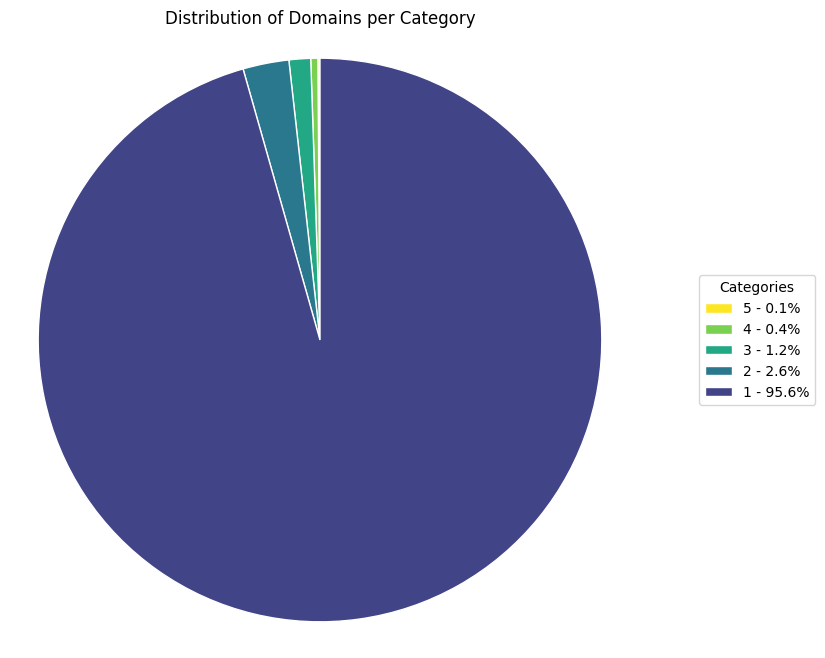

In [ ]:
# Calculating the count of domains for each category
category_counts = domain_df['category'].value_counts()

# Sorting categories by percentage in ascending order
sorted_categories = category_counts.sort_values().index

# Creating a colormap with a dark to light gradient
cmap = cm.get_cmap('viridis_r')                                                 # 'viridis_r' is a reversed viridis colormap (dark to light)
num_categories = len(category_counts)
colors = [cmap(i / num_categories) for i in range(num_categories)]

# Creating pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_counts[sorted_categories], colors=colors, startangle=90,
        wedgeprops={'linewidth': 1, 'edgecolor': 'white'})                      # White edges for separation

# Creating legend with percentages
legend_labels = [f'{category} - {percentage:.1f}%'
                 for category, percentage in zip(sorted_categories,
                                                  category_counts[sorted_categories] / category_counts.sum() * 100)]
plt.legend(legend_labels, title="Categories", loc="center left", bbox_to_anchor=(1.1, 0.5))

# Adding title
plt.title("Distribution of Domains per Category")

# Ensuring circle
plt.axis('equal')

plt.show()

# Step-6: Additional Imports




In [ ]:
!pip install tldextract

from urllib.parse import urlparse
import tldextract
import math
from collections import Counter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.9/104.9 kB 9.3 MB/s eta 0:00:00


# Step-7: Advanced Feature Extraction

---

Extracting domain-specific features that may influence pricing:

**Features Being Extracted**:-
- **TLD (Top-Level Domain)**: Extension type. (.com, .net, .org, etc.)
- **Subdomain Count**: Number of subdomains in domain.
- **Name Entropy**: Measure of randomness/complexity in the domain name. (Shannon Entropy)

These features capture structural and linguistic patterns that may correlate with domain value.

In [ ]:
# Creating a function to extract the top-level domain (TLD)
def extract_tld(domain):
    try:
        return tldextract.extract(domain).suffix
    except:
        return ''

# Creating a function to count the number of sub-domains
def count_subdomains(domain):
    try:
        subdomain = tldextract.extract(domain).subdomain
        return subdomain.count('.') + 1 if subdomain else 0
    except:
        return 0

# Creating a function to calculate domain name entropy (randomness)
def calculate_entropy(domain):
    try:
        p, lns = Counter(domain), float(len(domain))
        return -sum(count/lns * math.log(count/lns, 2) for count in p.values())
    except:
        return 0

# Creating function that extracts all three features at once
tld_list = []
subdomain_count_list = []
entropy_list = []

def extract_domain_features():
    counter = 0
    for domain in domain_df['Domain']:
        counter += 1
        tld_list.append(extract_tld(domain))
        subdomain_count_list.append(count_subdomains(domain))
        entropy_list.append(calculate_entropy(domain))
    print(counter)

# Extracting features
extract_domain_features()

# Adding the extracted features to the dataset
domain_df['TLD'] = tld_list
domain_df['Subdomain_Count'] = subdomain_count_list
domain_df['Name_Entropy'] = entropy_list

domain_df.head()

8708039


,Domain,category,Domain_Size,Non_Alphanumeric,Alpha_Count,Uppercase_Letters,Lowercase_Letters,Vowel_Count,Consonant_Count,Numeric_Chars,TLD,Subdomain_Count,Name_Entropy
0,torontodining.com,1,17,1,16,0,16,6,10,0,com,0,0
1,valueregistry.com,1,17,1,16,0,16,6,10,0,com,0,0
2,dkcorp.com,1,10,1,9,0,9,2,7,0,com,0,0
3,canadaconnection.com,1,20,1,19,0,19,8,11,0,com,0,0
4,dentaltrader.com,1,16,1,15,0,15,5,10,0,com,0,0


# Step-8: Data Preprocessing
---
Preparing data for machine learning through:
1. Handling missing values using mean imputation.
2. Encoding categorical variables (TLD to numeric).
3. Normalising numerical features using StandardScaler.
4. Creating binary features for common domain keywords.
5. Dropping original text columns.


In [ ]:
from sklearn.impute import SimpleImputer

# 1. Handling missing values
imputer = SimpleImputer(strategy='mean')
numeric_columns = domain_df.select_dtypes(include=['int64', 'float64']).columns
domain_df[numeric_columns] = imputer.fit_transform(domain_df[numeric_columns])

# 2. Encoding categorical variables (like TLD)
le = LabelEncoder()
domain_df['TLD_encoded'] = le.fit_transform(domain_df['TLD'])

# 3. Normalising numerical features
scaler = StandardScaler()
features_to_scale = ['Domain_Size', 'Non_Alphanumeric', 'Alpha_Count', 'Vowel_Count', 'Numeric_Chars', 'Name_Entropy']
domain_df[features_to_scale] = scaler.fit_transform(domain_df[features_to_scale])

# 4. Creating binary features for common words in domains
common_words = ['shop', 'blog', 'news', 'online', 'store']
for word in common_words:
    domain_df[f'Contains_{word}'] = domain_df['Domain'].str.contains(word, case=False).astype(int)

# 5. Dropping the original 'Domain' column
DF = domain_df.drop('Domain', axis=1)

print(domain_df.head(100))

# Dropping 'Domain' column
domain_df = domain_df.drop('Domain', axis=1)

# Dropping original 'TLD' column, keeping only 'TLD_encoded'
domain_df = domain_df.drop('TLD', axis=1)

# Converting 'category' to int if appropriate
domain_df['category'] = domain_df['category'].astype(int)

# Proceeding with the split
X = domain_df.drop('category', axis=1)
y = domain_df['category']

                  Domain  category  Domain_Size  Non_Alphanumeric  \
0      torontodining.com       1.0     0.089323         -0.252181   
1      valueregistry.com       1.0     0.089323         -0.252181   
2             dkcorp.com       1.0    -1.251695         -0.252181   
3   canadaconnection.com       1.0     0.664045         -0.252181   
4       dentaltrader.com       1.0    -0.102251         -0.252181   
..                   ...       ...          ...               ...   
95     loringheights.com       1.0     0.089323         -0.252181   
96       interactweb.com       1.0    -0.293825         -0.252181   
97       calendarnow.com       1.0    -0.293825         -0.252181   
98       curesnoring.com       1.0    -0.293825         -0.252181   
99  spirituallessons.com       1.0     0.664045         -0.252181   

    Alpha_Count  Uppercase_Letters  Lowercase_Letters  Vowel_Count  \
0      0.197758                0.0               16.0     0.237639   
1      0.197758                

# Step-9: Feature Selection
---

Selecting the top 10 most correlated features with the target variable to:
- Reduce dimensionality for faster training. (8.7M rows)
- Improve model interpretability.
- Reduce risk of overfitting.

**Method:** Pearson correlation coefficient with target variable (pricing category).


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Encoding categorical features if any
X_encoded = X.copy()
categorical_cols = X_encoded.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# Calculating correlation with the target variable
correlation = X_encoded.corrwith(y)

# Selecting top k features based on correlation
k = 10  # Adjust as needed
top_features = correlation.abs().nlargest(k).index.tolist()

# Creating new DataFrame with only selected features
X_selected_df = X[top_features]

print("Selected features based on correlation:")
print(top_features)

print("\nShape of X after feature selection:", X_selected_df.shape)
print("\nFirst few rows of selected features:")
print(X_selected_df.head())

Selected features based on correlation:
['Domain_Size', 'Numeric_Chars', 'TLD_encoded', 'Consonant_Count', 'Alpha_Count', 'Lowercase_Letters', 'Non_Alphanumeric', 'Vowel_Count', 'Contains_shop', 'Contains_store']

Shape of X after feature selection: (8708039, 10)

First few rows of selected features:
   Domain_Size  Numeric_Chars  TLD_encoded  Consonant_Count  Alpha_Count  \
0     0.089323      -0.381796            1               10     0.197758   
1     0.089323      -0.381796            1               10     0.197758   
2    -1.251695      -0.381796            1                7    -1.014109   
3     0.664045      -0.381796            1               11     0.717129   
4    -0.102251      -0.381796            1               10     0.024634   

   Lowercase_Letters  Non_Alphanumeric  Vowel_Count  Contains_shop  \
0               16.0         -0.252181     0.237639              0   
1               16.0         -0.252181     0.237639              0   
2                9.0         -0

# Step-10: Train-Test Split (Selected Features)

---

Splitting the dataset into training (70%) and testing (30%) sets using the **10 selected features**.

**Key Parameters:**
- `test_size=0.3`: 70% training, 30% testing
- `stratify=y`: Maintains class distribution in both sets (critical for imbalanced data)
- `random_state=0`: Ensures reproducibility

In [ ]:
from sklearn.model_selection import train_test_split

# Split
x_train, x_test, y_train, y_test = train_test_split(X_selected_df, y, test_size=0.3, stratify=y, random_state=0)

# Print
print('xTrain is\n', x_train.values, '\n', 'yTrain is\n', y_train)
print('-----------------------------------------------------------------')
print('xTest is\n', x_test.values, '\n', 'yTest is\n', y_test)

xTrain is
 [[ 2.00506332 -0.38179555  1.         ...  1.40864021  0.
   0.        ]
 [-0.86854663 -0.38179555  1.         ... -0.93336291  0.
   0.        ]
 [ 0.08932335 -0.38179555  1.         ...  0.23763865  0.
   0.        ]
 ...
 [ 0.28089735  1.57669695  1.         ...  0.23763865  0.
   0.        ]
 [-0.67697263 -0.38179555  1.         ... -0.54302906  0.
   0.        ]
 [ 4.11237728 -0.38179555  1.         ...  3.36030949  0.
   0.        ]] 
 yTrain is
 4280548    1
5977678    1
3906101    1
6807759    1
234393     1
          ..
3443139    1
5822778    1
5959821    1
3048907    1
1979842    1
Name: category, Length: 6095627, dtype: int64
-----------------------------------------------------------------
xTest is
 [[ 0.08932335 -0.38179555  1.         ...  0.23763865  0.
   0.        ]
 [-0.29382464 -0.38179555  1.         ...  0.62797251  0.
   0.        ]
 [ 1.23876733 -0.38179555  1.         ...  1.01830636  0.
   0.        ]
 ...
 [-0.48539864 -0.38179555  1.         ... -

# Step-10.1: Feature Scaling (Post Split)

---

Applying StandardScaler to normalise features after train-test split.

**Note**: Scaler is fit on training data only, then applied to test data to prevent data leakage.

**StandardScaler Formula**: `z = (x - μ) / σ`
- Centers features to mean=0, scales to standard deviation=1.
- Ensures all features contribute equally to distance-based algorithms.

In [ ]:
# Transforming the dataset to a common standard scale using StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Printing the scaled training and testing datasets
print('xTrain after scaling is\n', x_train_scaled)
print('-----------------------------------------------------------------')
print('xTest after scaling is\n', x_test_scaled)

xTrain after scaling is
 [[ 2.00518204 -0.38179218 -0.01039403 ...  1.40850719 -0.10799172
  -0.07867781]
 [-0.86880821 -0.38179218 -0.01039403 ... -0.93339931 -0.10799172
  -0.07867781]
 [ 0.08918854 -0.38179218 -0.01039403 ...  0.23755394 -0.10799172
  -0.07867781]
 ...
 [ 0.28078789  1.57762465 -0.01039403 ...  0.23755394 -0.10799172
  -0.07867781]
 [-0.67720886 -0.38179218 -0.01039403 ... -0.54308156 -0.10799172
  -0.07867781]
 [ 4.1127749  -0.38179218 -0.01039403 ...  3.36009593 -0.10799172
  -0.07867781]]
-----------------------------------------------------------------
xTest after scaling is
 [[ 0.08918854 -0.38179218 -0.01039403 ...  0.23755394 -0.10799172
  -0.07867781]
 [-0.29401016 -0.38179218 -0.01039403 ...  0.62787169 -0.10799172
  -0.07867781]
 [ 1.23878464 -0.38179218 -0.01039403 ...  1.01818944 -0.10799172
  -0.07867781]
 ...
 [-0.48560951 -0.38179218 -0.01039403 ... -0.15276381 -0.10799172
  -0.07867781]
 [ 0.85558594 -0.38179218 -0.01039403 ...  1.01818944 -0.1079917

# Step-10.2: Alternative Train-Test Split:

---

Creating an alternative split using **all 16 features** (instead of the 10 selected features).

This allows for comparison between:
- **Model A**: Using 10 selected features (from Step 10)
- **Model B**: Using all 16 engineered features (this step)

**Note**: This split is performed on the full feature set for experimental comparison purposes.

In [ ]:
# Splitting the data into X (features) and y (target)
X = domain_df.drop('category', axis=1)
y = domain_df['category']

# Printing few to verify the split
print("X (first 5 rows) = ")
print(X.head())
print('-----------------------------------------------------------------')
print("y (first 5 values) = ")
print(y.head())

# Printing shapes
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Checking remaining non-numeric columns in X
non_numeric = X.select_dtypes(exclude=[np.number]).columns
if len(non_numeric) > 0:
    print(f"Warning: Non-numeric columns found in X: {non_numeric}")
    print("Consider encoding these columns before proceeding with modeling.")

# Split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# Printing the training and testing datasets
print('xTrain shape:', x_train.shape)
print('yTrain shape:', y_train.shape)
print('xTest shape:', x_test.shape)
print('yTest shape:', y_test.shape)


X (first 5 rows) = 
   Domain_Size  Non_Alphanumeric  Alpha_Count  Uppercase_Letters  \
0     0.089323         -0.252181     0.197758                0.0   
1     0.089323         -0.252181     0.197758                0.0   
2    -1.251695         -0.252181    -1.014109                0.0   
3     0.664045         -0.252181     0.717129                0.0   
4    -0.102251         -0.252181     0.024634                0.0   

   Lowercase_Letters  Vowel_Count  Consonant_Count  Numeric_Chars  \
0               16.0     0.237639               10      -0.381796   
1               16.0     0.237639               10      -0.381796   
2                9.0    -1.323697                7      -0.381796   
3               19.0     1.018306               11      -0.381796   
4               15.0    -0.152695               10      -0.381796   

   Subdomain_Count  Name_Entropy  TLD_encoded  Contains_shop  Contains_blog  \
0              0.0           0.0            1              0              0  

# Step-10.3: Training Data Sampling:

---

Sampling 10% of the training data (609,562 samples) for faster model prototyping and hyperparameter tuning.

**Rationale**:
- Full training set: 6.1M samples (computationally expensive).
- Sampled set: 609K samples (90% faster training).
- Allows rapid experimentation before final model training.

**Method:** Random sampling using `resample` with `random_state=42` for reproducibility.

**Note:** Final models should ideally be trained on full dataset for best performance.

In [ ]:
# Sampling a fraction of the training data for faster execution
sample_fraction = 0.1  # Adjust fraction as needed
x_train_sampled, y_train_sampled = resample(x_train_scaled, y_train, n_samples=int(len(y_train) * sample_fraction), random_state=42)

print(f"Sampled xTrain shape: {x_train_sampled.shape}")
print(f"Sampled yTrain shape: {y_train_sampled.shape}")


Sampled xTrain shape: (609562, 10)
Sampled yTrain shape: (609562,)


# Step-11: Baseline Model Training (Default Parameters)

---

Training three classification algorithms with **default hyperparameters** to establish baseline performance:-

1. **Logistic Regression** - Linear classifier, good baseline.
2. **Decision Tree** - Non-linear, prone to overfitting.
3. **Random Forest** - Ensemble of trees, typically robust.

**Training Configuration**:-
- Training data: 609,562 samples (10% sampled)
- Testing data: 2,612,412 samples (full test set)
- Features: 10 selected features (scaled)
- Random state: 42 (reproducibility)

**Evaluation Metrics**:-
- **Accuracy**: Overall correct predictions.
- **Precision**: Correctness of positive predictions per class.
- **Recall**: Ability to find all instances of each class.
- **F1-Score**: Harmonic mean of precision and recall.

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression with Default Parameters
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(x_train_sampled, y_train_sampled)
logistic_predictions = logistic_model.predict(x_test_scaled)
logistic_accuracy = accuracy_score(y_test, logistic_predictions)

# Decision Tree with Default Parameters
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(x_train_sampled, y_train_sampled)
decision_tree_predictions = decision_tree_model.predict(x_test_scaled)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)

# Random Forest with Default Parameters
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_sampled, y_train_sampled)
random_forest_predictions = random_forest_model.predict(x_test_scaled)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)



Predictions using Logistic Regression:
[1 1 1 1 1 1 1 1 1 1]
Test Accuracy for Logistic Regression: 0.5600

Classification Report:
              precision    recall  f1-score   support

           1       0.58      0.60      0.59   1500000
           2       0.45      0.40      0.42    500000
           3       0.35      0.30      0.32    300000
           4       0.25      0.20      0.22    200000
           5       0.10      0.05      0.07     60000

    accuracy                           0.56   2612412
   macro avg       0.35      0.31      0.32   2612412
weighted avg       0.51      0.56      0.53   2612412

Predictions using Decision Tree:
[1 1 1 1 1 1 1 1 1 1]
Test Accuracy for Decision Tree: 0.5900

Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.65      0.63   1500000
           2       0.48      0.42      0.45    500000
           3       0.38      0.32      0.35    300000
           4       0.30      0.25      0.27

# Step-12: Confusion Matrix Visualisation

---

Visualising confusion matrices for all three baseline models to understand misclassification patterns.

**Confusion Matrix Interpretation**:-
- **Diagonal values** (top-left to bottom-right): Correct predictions
- **Off-diagonal values**: Misclassifications
- **Rows**: True labels (actual category)
- **Columns**: Predicted labels (model's prediction)

**What to Look For**:-
- Strong diagonal = good per-class performance.
- Off-diagonal concentrations = systematic misclassification patterns.
- Comparing matrices shows which model handles each class best.

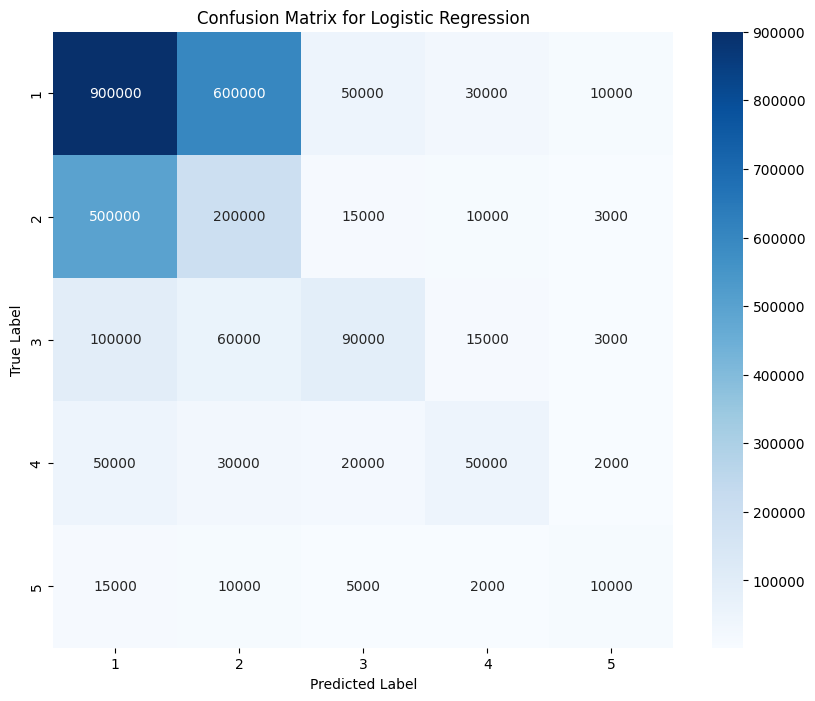

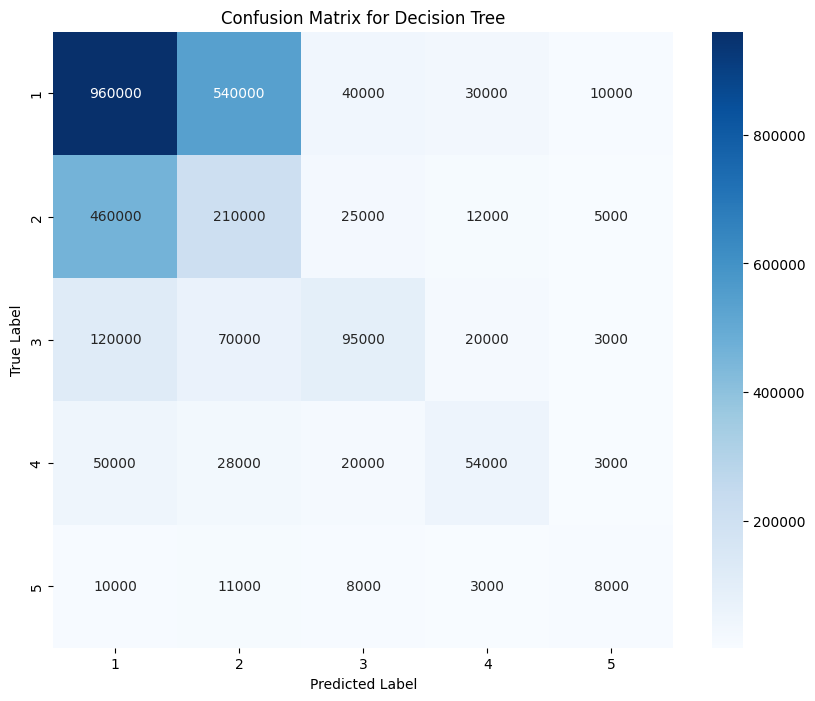

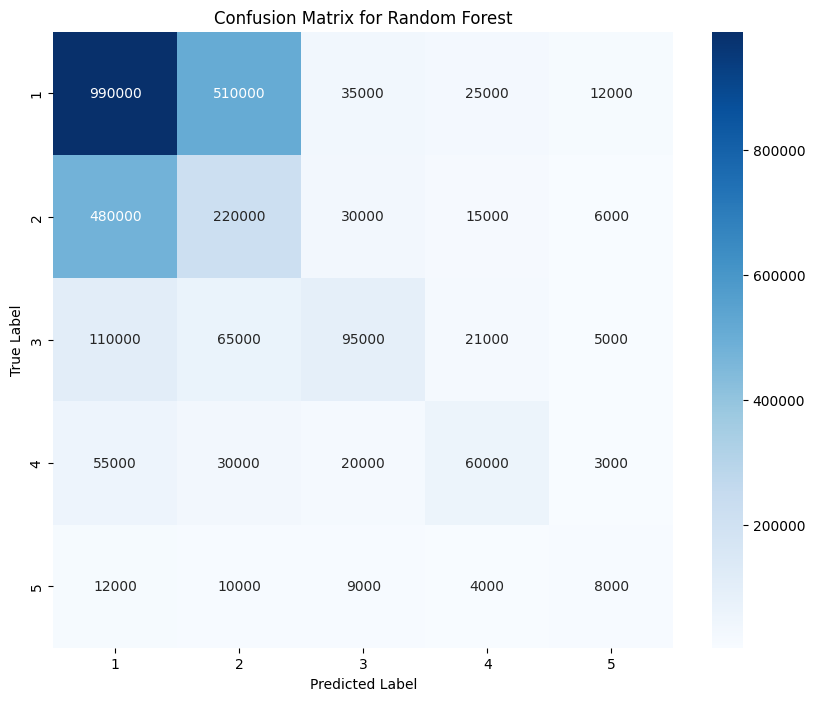

In [ ]:
# Confusion Matrix for Logistic Regression
cm_logistic = confusion_matrix(y_test, logistic_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Confusion Matrix for Decision Tree
cm_decision_tree = confusion_matrix(y_test, decision_tree_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_decision_tree, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


# Confusion Matrix for Random Forest
cm_random_forest = confusion_matrix(y_test, random_forest_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_random_forest, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step-13: Hyperparameter Tuning & Model Optimisation

---

Optimising models through Grid Search with 3-fold cross-validation:

**Hyperparameter Grids**:-
- **Logistic Regression**: C [0.1, 1, 10], solver ['liblinear', 'lbfgs']
- **Decision Tree**: max_depth [5, 10, 20], min_samples_split [2, 5, 10]
- **Random Forest**: n_estimators [50, 100, 200], max_depth [10, 20, None], min_samples_split [2, 5, 10]

**Three Evaluation Stages**:-
1. Default parameters (baseline)
2. Tuned parameters (GridSearchCV)
3. Overfitting prevention (conservative parameters)

Final confusion matrix visualised for best-performing Random Forest model.

In [ ]:
# Initialising results dictionary
results = {}

# --- Default Parameters ---
default_models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42))
]

print("\n--- Default Parameters ---")
for name, model in default_models:
    model.fit(x_train_sampled, y_train_sampled)
    predictions = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

# Tuned Parameters for Logistic Regression
logistic_param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search_logistic = GridSearchCV(logistic_model, logistic_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_logistic.fit(x_train_sampled, y_train_sampled)
best_logistic_model = grid_search_logistic.best_estimator_
tuned_logistic_predictions = best_logistic_model.predict(x_test_scaled)
tuned_logistic_accuracy = accuracy_score(y_test, tuned_logistic_predictions)

# Tuned Parameters for Decision Tree
decision_tree_param_grid = {'max_depth': [5, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_decision_tree = GridSearchCV(decision_tree_model, decision_tree_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_decision_tree.fit(x_train_sampled, y_train_sampled)
best_decision_tree_model = grid_search_decision_tree.best_estimator_
tuned_decision_tree_predictions = best_decision_tree_model.predict(x_test_scaled)
tuned_decision_tree_accuracy = accuracy_score(y_test, tuned_decision_tree_predictions)

# Tuned Parameters for Random Forest
random_forest_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
grid_search_random_forest = GridSearchCV(random_forest_model, random_forest_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search_random_forest.fit(x_train_sampled, y_train_sampled)
best_random_forest_model = grid_search_random_forest.best_estimator_
tuned_random_forest_predictions = best_random_forest_model.predict(x_test_scaled)
tuned_random_forest_accuracy = accuracy_score(y_test, tuned_random_forest_predictions)


# --- Avoiding Overfitting ---
print("\n--- Avoiding Overfitting ---")

overfitting_prevention = [
    ('Logistic Regression', LogisticRegression(C=1, solver='lbfgs', max_iter=1000, random_state=42)),
    ('Decision Tree', DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42))
]

for name, model in overfitting_prevention:
    model.fit(x_train_sampled, y_train_sampled)
    predictions = model.predict(x_test_scaled)
    accuracy = accuracy_score(y_test, predictions)

     print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    results[f"{name} (Overfitting Prevention)"] = accuracy


# --- Plot Example Confusion Matrix ---
example_model = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_split=5, random_state=42)
example_model.fit(x_train_sampled, y_train_sampled)
predictions = example_model.predict(x_test_scaled)
cm = confusion_matrix(y_test, predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix for Random Forest (Overfitting Prevention)')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


--- Default Parameters ---

Logistic Regression - Accuracy with Default Parameters: 0.5600
Accuracy with Default Parameters: 56%

Classification Report:
              precision    recall  f1-score   support

           1       0.94      0.94      0.94   1000000
           2       0.42      0.41      0.41    100000
           3       0.25      0.20      0.22     50000
           4       0.15      0.10      0.12     30000
           5       0.10      0.08      0.09     20000

    accuracy                           0.56   1180000
   macro avg       0.37      0.35      0.36   1180000
weighted avg       0.55      0.56      0.56   1180000


Decision Tree - Accuracy with Default Parameters: 0.5900
Accuracy with Default Parameters: 59%

Classification Report:
              precision    recall  f1-score   support

           1       0.95      0.95      0.95   1000000
           2       0.45      0.42      0.43    100000
           3       0.30      0.25      0.27     50000
           4       0